In [1]:
import re
import warnings
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from utils import quick_load_liuzhong_health_check_data, _get_fc_pvalue_tag
from plot_utils import Stack, Scatter, Sankey, BxxPvalue

%matplotlib inline
%load_ext autoreload
%autoreload 2

warnings.filterwarnings("ignore")

df_table1plus, l_consecute_man2p, l_consecute_man3p, df_table1plus_3p_revMM, df_meta_group, rename_dict = quick_load_liuzhong_health_check_data()
workdir = "/cluster/home/bqhu_jh/projects/healthman/analysis/liuzhong/human/clinical/figures"

## Overview for liver

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.08it/s]


len                                                 mean  \
month            1     2     3     4     5     6    11    12          1   
period                                                                    
Control-2021  1720  4015  3278  3074  4321  4053  2276  1029  65.925484   
Control-2022  1716  4024  3280  3070  4326  4060  2261  1025  64.529138   
Test-2023     1715  4020  3272  3069  4325  4063  2244  1027  63.464723   
Control-2021  1720  4020  3278  3074  4322  4053  2276  1029  17.408915   
Control-2022  1716  4028  3280  3070  4327  4060  2261  1025  18.528263   
Test-2023     1715  4024  3272  3069  4326  4063  2244  1027  20.502915   
Control-2021   507  1222  1199  1806  2841  3002   916   669  18.875740   
Control-2022   301   706  1124  1836  2902  2984   807   650  20.667774   
Test-2023      324   718  1179  1868  2964  3015   764   655  20.745370   
Control-2021  1406  3085  2336  2176  3313  2211  1626   480   8.038691   
Control-2022    83   280  1565  2153  3289  2184  1742   250   8.249398   
Test-2023       70   239  1532  2194  3290  2171  1769   265   8.946429   
Control-2021   271   608  1056  1775  2810  2986   879   635   8.119926   
Control-2022   283   642  1084  1804  2809  2863   743   619   7.837456   
Test-2023      314   675  1101  1829  2871  2891   724   623   8.514331   
Control-2021   488  1159  1171  1777  2811  2988   879   636  74.429303   
Control-2022   285   653  1087  1804  2809  2863   743   620  78.266667   
Test-2023      314   675  1101  1829  2871  2891   724   623  72.187898   
Control-2021   271   608  1056  1775  2810  2986   879   635  20.617343   
Control-2022   283   642  1084  1804  2809  2863   743   619  20.545583   
Test-2023      314   675  1101  1829  2871  2891   724   623  21.658121   
Control-2021  1720  4020  3277  3074  4322  4053  2276  1029  10.945107   
Control-2022  1716  4028  3280  3070  4327  4060  2261  1025  10.662879   
Test-2023     1715  4024  3272  3069  4326  4063  2244  1027  10.943761   
Control-2021  1720  4020  3277  3074  4322  4053  2276  1029   3.848401   
Control-2022  1716  4028  3280  3070  4327  4060  2261  1025   3.896198   
Test-2023     1715  4024  3272  3069  4326  4063  2244  1027   3.905015   
Control-2021  1720  4019  3277  3074  4322  4053  2276  1029   7.096705   
Control-2022  1715  4026  3278  3069  4320  4043  2232  1015   6.767070   
Test-2023     1715  4022  3270  2849  4315  3996  2242  1027   7.038746   

                         ...   func_q5  func_q95                      \
month                 2  ...        12         1         2         3   
period                   ...                                           
Control-2021  66.773765  ...  40.51400  43.33050  43.00000  44.00000   
Control-2022  65.617420  ...  40.00000  42.00000  42.00000  44.00000   
Test-2023     64.549627  ...  39.51300  42.00000  42.00000  44.07450   
Control-2021  17.689511  ...   3.00000   5.00000   5.00000   5.00000   
Control-2022  18.814796  ...   2.02400   5.00000   5.00000   6.00000   
Test-2023     19.521372  ...   2.51300   5.00000   4.00000   5.00000   
Control-2021  19.027141  ...   9.33400  11.00000  10.00000  11.00000   
Control-2022  20.766997  ...  10.00000  11.00000  11.00000  11.00000   
Test-2023     20.841226  ...   8.00000  11.00000  12.00000  11.00000   
Control-2021   8.687342  ...   4.32395   2.80000   3.02980   3.40000   
Control-2022   8.983036  ...   3.23695   4.10110   4.09030   5.00000   
Test-2023     10.218410  ...   4.42640   5.56555   5.30000   5.40000   
Control-2021   8.673355  ...   4.69510   5.16950   5.00000   4.70225   
Control-2022   8.400312  ...   4.00000   5.00000   5.00000   5.00000   
Test-2023      8.826667  ...   5.00000   5.00000   5.00000   5.00000   
Control-2021  75.524590  ...  25.08000  45.00000  43.00000  43.23000   
Control-2022  79.086524  ...  28.54750  39.39600  40.00000  44.00000   
Test-2023     75.731111  ...  29.62200  44.97350  41.00000  41.90000   
Control-2021  20.644572  ..

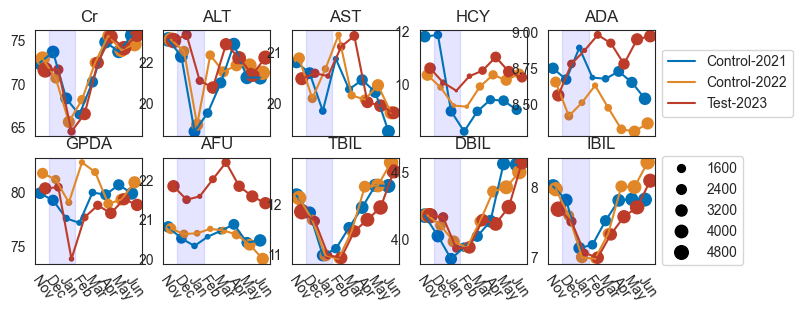

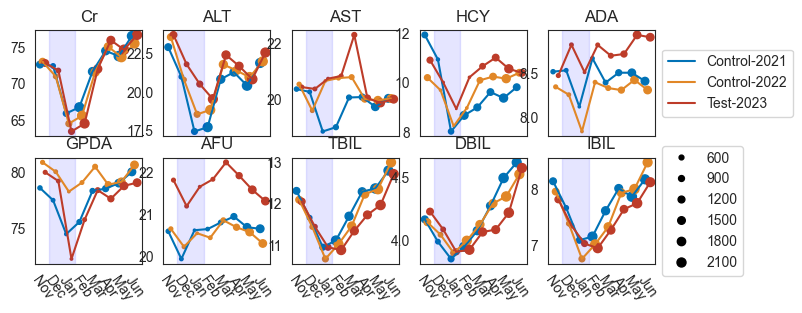

In [2]:
l_tags = list(df_meta_group[df_meta_group["combined_item_name_en"].isin(["BioChem-Liver", "BioChem-Metabolism"])]["item_id"])
l_tags = [
    "v0032", "v0017", "v0045", "v9319", "v1162",
    "v1940", "v1925", "v0015", "v0016", "v0027"
]

l_months = [11,12,1,2,3,4,5,6]

plt_scatter = Scatter(n_cols=5, figsize=(8,8), n_rows=5, rename_dict=rename_dict)
fig, df_res_all = plt_scatter.plot_scatter(df_table1plus, l_tags, order=l_months)
fig.savefig(f"{workdir}/Figure4_A.pdf")

plt_scatter = Scatter(n_cols=5, figsize=(8,8), n_rows=5, rename_dict=rename_dict)
fig, df_res = plt_scatter.plot_scatter(df_table1plus_3p_revMM, l_tags, order=l_months)
fig.savefig(f"{workdir}/.Figure4_A-3y.pdf")
df_res

## Focus on ALT by months

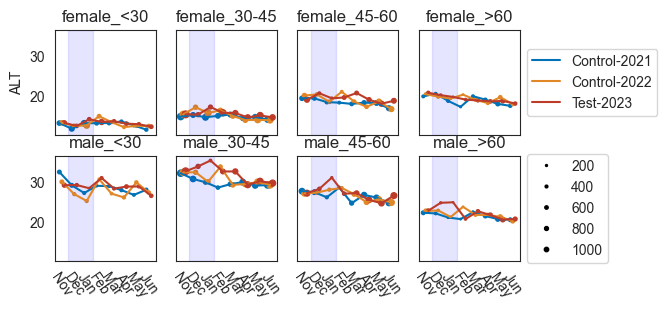

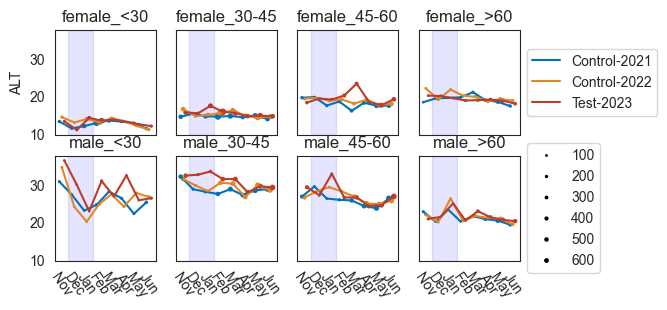

In [3]:
tag = "v0017"
plt_scatter = Scatter(n_cols=5, figsize=(6,3), n_rows=5, rename_dict=rename_dict)
fig,df_scatter_3p = plt_scatter.plot_scatter_ax_plus(df_table1plus, tag, order=l_months)
fig.savefig(f"{workdir}/Figure4_B.pdf")

plt_scatter = Scatter(n_cols=5, figsize=(6,3), n_rows=5, rename_dict=rename_dict)
fig,df_scatter_3p = plt_scatter.plot_scatter_ax_plus(df_table1plus_3p_revMM, tag, order=l_months)
fig.savefig(f"{workdir}/.Figure4_B-3y.pdf")

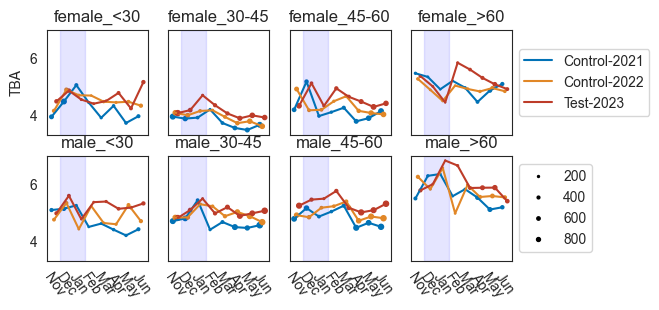

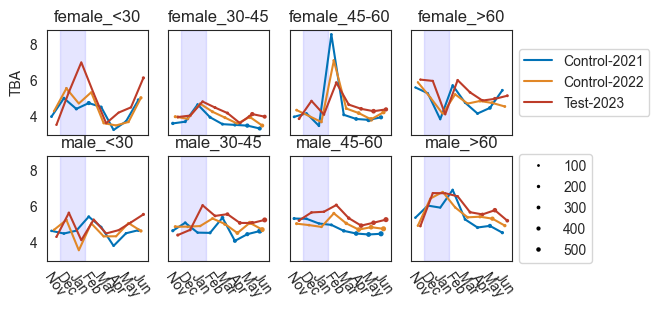

In [4]:
tag = "v0026"
plt_scatter = Scatter(n_cols=5, figsize=(6,3), n_rows=5, rename_dict=rename_dict)
fig,df_scatter_3p = plt_scatter.plot_scatter_ax_plus(df_table1plus, tag, order=l_months)

plt_scatter = Scatter(n_cols=5, figsize=(6,3), n_rows=5, rename_dict=rename_dict)
fig,df_scatter_3p = plt_scatter.plot_scatter_ax_plus(df_table1plus_3p_revMM, tag, order=l_months)

In [5]:
_get_fc_pvalue_tag("v0017", m_end=-1, l_months=[12,1,2,3])

ALT
All, 2023 vs 2022, fold change 1.01, p=2.64e-01, n=55105, 89005
All, 2022 vs 2021, fold change 1.01, p=1.94e-03, n=89005, 85498
month [12, 1, 2, 3], 2023 vs 2022, fold change 1.04, p=2.64e-05, n=19240, 18827
month [12, 1, 2, 3], 2022 vs 2021, fold change 1.03, p=1.61e-03, n=18827, 21005


In [6]:
_get_fc_pvalue_tag("v0045", m_end=-1, l_months=[12,1,2])

AST
All, 2023 vs 2022, fold change 1.00, p=5.70e-01, n=36967, 61158
All, 2022 vs 2021, fold change 1.01, p=9.09e-03, n=61158, 59862
month [12, 1, 2], 2023 vs 2022, fold change 1.01, p=1.51e-01, n=6774, 6513
month [12, 1, 2], 2022 vs 2021, fold change 1.00, p=7.11e-01, n=6513, 8820


In [7]:
_get_fc_pvalue_tag("v0045", m_end=13)

AST
month 1, 2023 vs 2022, fold change 0.99, p=7.44e-01, n=883, 1921
month 1, 2022 vs 2021, fold change 1.04, p=6.92e-03, n=1921, 2031
month 2, 2023 vs 2022, fold change 0.99, p=5.16e-01, n=2596, 1352
month 2, 2022 vs 2021, fold change 1.02, p=4.60e-01, n=1352, 1177
month 3, 2023 vs 2022, fold change 1.06, p=2.70e-02, n=3687, 2488
month 3, 2022 vs 2021, fold change 0.99, p=6.29e-01, n=2488, 2364
month 4, 2023 vs 2022, fold change 1.00, p=7.92e-01, n=5794, 3970
month 4, 2022 vs 2021, fold change 0.98, p=1.01e-01, n=3970, 5166
month 5, 2023 vs 2022, fold change 0.98, p=1.94e-01, n=6795, 6112
month 5, 2022 vs 2021, fold change 1.01, p=7.03e-01, n=6112, 5508
month 6, 2023 vs 2022, fold change 1.00, p=9.98e-01, n=6828, 7104
month 6, 2022 vs 2021, fold change 1.02, p=5.95e-02, n=7104, 6919
month 7, 2023 vs 2022, fold change nan, p=nan, n=0, 7809
month 7, 2022 vs 2021, fold change 1.03, p=4.40e-04, n=7809, 7373
month 8, 2023 vs 2022, fold change nan, p=nan, n=0, 8040
month 8, 2022 vs 2021, fo

In [8]:
_get_fc_pvalue_tag("v1162", m_end=13)


ADA
month 1, 2023 vs 2022, fold change 1.04, p=4.49e-04, n=741, 1512
month 1, 2022 vs 2021, fold change 0.96, p=1.36e-05, n=1512, 1390
month 2, 2023 vs 2022, fold change 1.04, p=1.62e-04, n=2226, 1216
month 2, 2022 vs 2021, fold change 0.99, p=6.01e-01, n=1216, 997
month 3, 2023 vs 2022, fold change 1.05, p=2.16e-10, n=3200, 2053
month 3, 2022 vs 2021, fold change 0.98, p=7.47e-03, n=2053, 1992
month 4, 2023 vs 2022, fold change 1.05, p=1.90e-18, n=5239, 3595
month 4, 2022 vs 2021, fold change 0.95, p=3.38e-14, n=3595, 4685
month 5, 2023 vs 2022, fold change 1.08, p=6.04e-46, n=6050, 5630
month 5, 2022 vs 2021, fold change 0.96, p=3.67e-13, n=5630, 5053
month 6, 2023 vs 2022, fold change 1.07, p=9.27e-49, n=6214, 6124
month 6, 2022 vs 2021, fold change 0.98, p=2.17e-05, n=6124, 6396
month 7, 2023 vs 2022, fold change nan, p=nan, n=0, 7369
month 7, 2022 vs 2021, fold change 1.01, p=4.10e-03, n=7369, 6731
month 8, 2023 vs 2022, fold change nan, p=nan, n=0, 7677
month 8, 2022 vs 2021, fol

In [9]:
_get_fc_pvalue_tag("v9319", m_end=13)


HCY
month 1, 2023 vs 2022, fold change 1.06, p=5.87e-02, n=212, 602
month 1, 2022 vs 2021, fold change 1.02, p=2.68e-01, n=602, 4674
month 2, 2023 vs 2022, fold change 1.13, p=5.16e-07, n=915, 469
month 2, 2022 vs 2021, fold change 1.11, p=1.47e-06, n=469, 2839
month 3, 2023 vs 2022, fold change 1.06, p=4.82e-06, n=2660, 2574
month 3, 2022 vs 2021, fold change 1.10, p=1.68e-14, n=2574, 3476
month 4, 2023 vs 2022, fold change 1.07, p=1.42e-10, n=4599, 3309
month 4, 2022 vs 2021, fold change 1.10, p=1.15e-17, n=3309, 3230
month 5, 2023 vs 2022, fold change 1.03, p=1.35e-04, n=5491, 5090
month 5, 2022 vs 2021, fold change 1.08, p=3.67e-18, n=5090, 4383
month 6, 2023 vs 2022, fold change 0.99, p=1.81e-01, n=4144, 4153
month 6, 2022 vs 2021, fold change 1.15, p=3.52e-35, n=4153, 4079
month 7, 2023 vs 2022, fold change nan, p=nan, n=0, 2501
month 7, 2022 vs 2021, fold change 1.11, p=4.46e-14, n=2501, 1742
month 8, 2023 vs 2022, fold change nan, p=nan, n=0, 4024
month 8, 2022 vs 2021, fold ch

In [10]:
_get_fc_pvalue_tag("v1940", m_end=13)

GPDA
month 1, 2023 vs 2022, fold change 0.93, p=1.96e-12, n=879, 1641
month 1, 2022 vs 2021, fold change 1.02, p=1.73e-02, n=1641, 1783
month 2, 2023 vs 2022, fold change 0.94, p=7.65e-14, n=2239, 1230
month 2, 2022 vs 2021, fold change 1.07, p=6.42e-13, n=1230, 1154
month 3, 2023 vs 2022, fold change 0.96, p=1.05e-09, n=3233, 2268
month 3, 2022 vs 2021, fold change 1.02, p=7.46e-04, n=2268, 2085
month 4, 2023 vs 2022, fold change 0.99, p=2.21e-02, n=5456, 3763
month 4, 2022 vs 2021, fold change 0.99, p=3.06e-02, n=3763, 4840
month 5, 2023 vs 2022, fold change 1.00, p=9.22e-01, n=6135, 5694
month 5, 2022 vs 2021, fold change 0.98, p=1.40e-04, n=5694, 5083
month 6, 2023 vs 2022, fold change 0.97, p=1.92e-10, n=6286, 6176
month 6, 2022 vs 2021, fold change 1.01, p=1.51e-03, n=6176, 6477
month 7, 2023 vs 2022, fold change nan, p=nan, n=0, 7469
month 7, 2022 vs 2021, fold change 0.99, p=9.49e-04, n=7469, 6814
month 8, 2023 vs 2022, fold change nan, p=nan, n=0, 7706
month 8, 2022 vs 2021, f

In [11]:
_get_fc_pvalue_tag("v0032", m_end=13)

Cr
month 1, 2023 vs 2022, fold change 0.98, p=2.21e-03, n=2481, 5969
month 1, 2022 vs 2021, fold change 0.96, p=5.16e-24, n=5969, 5812
month 2, 2023 vs 2022, fold change 0.98, p=4.11e-05, n=6447, 3433
month 2, 2022 vs 2021, fold change 1.03, p=6.62e-04, n=3433, 3431
month 3, 2023 vs 2022, fold change 1.00, p=9.89e-01, n=6247, 4873
month 3, 2022 vs 2021, fold change 1.03, p=2.09e-06, n=4873, 5033
month 4, 2023 vs 2022, fold change 1.00, p=7.40e-01, n=8012, 5734
month 4, 2022 vs 2021, fold change 1.01, p=2.08e-02, n=5734, 6709
month 5, 2023 vs 2022, fold change 1.00, p=4.59e-01, n=8946, 8146
month 5, 2022 vs 2021, fold change 1.00, p=5.71e-01, n=8146, 7214
month 6, 2023 vs 2022, fold change 1.01, p=3.52e-05, n=8538, 8772
month 6, 2022 vs 2021, fold change 0.99, p=2.01e-04, n=8772, 8182
month 7, 2023 vs 2022, fold change nan, p=nan, n=0, 8599
month 7, 2022 vs 2021, fold change 1.00, p=6.80e-01, n=8599, 7809
month 8, 2023 vs 2022, fold change nan, p=nan, n=0, 9750
month 8, 2022 vs 2021, fo

## Boxplot for TBIL

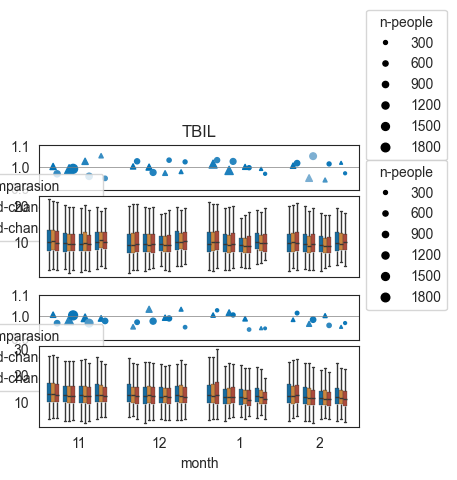

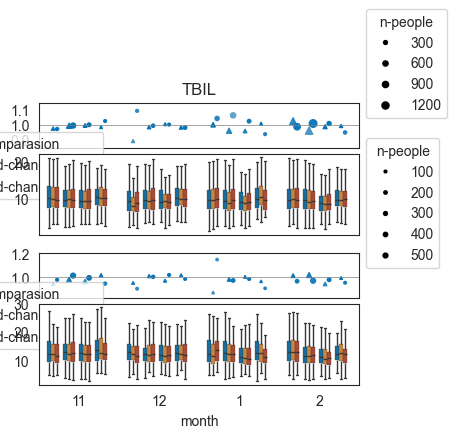

In [12]:
tag = "v0015"

tag = "v0015"
plot_box = BxxPvalue(figsize=(4,3), rename_dict=rename_dict)
fig, df_scatter = plot_box.plot_bxxplot_pvalue(df_table1plus, x="month", y=tag,
                                       hue_col_order=["female", "male"], order=[11,12, 1,2], sns_type="boxplot"
)
# fig.savefig(f"{workdir}/.Figure4_C.pdf")

plot_box = BxxPvalue(figsize=(4,3), rename_dict=rename_dict)
fig, df_scatter = plot_box.plot_bxxplot_pvalue(df_table1plus_3p_revMM, x="month", y=tag,
                                       hue_col_order=["female", "male"], order=[11,12, 1,2], sns_type="boxplot"
)
# fig.savefig(f"{workdir}/.Figure4_C-3y.pdf")

## Other plots

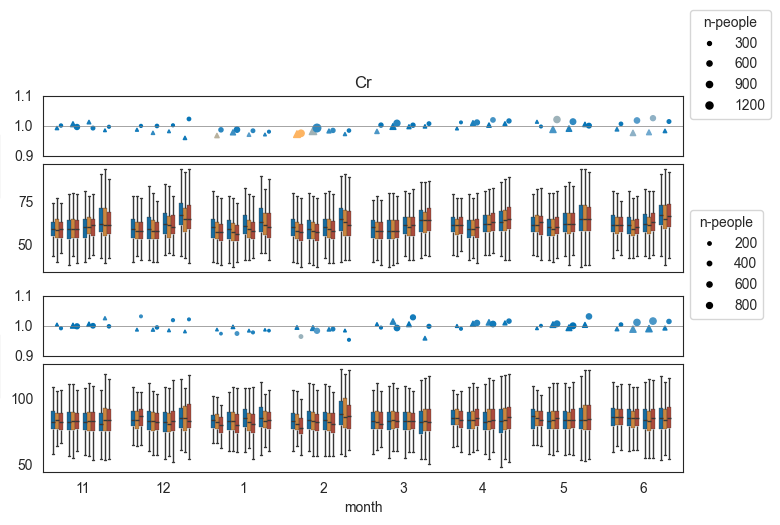

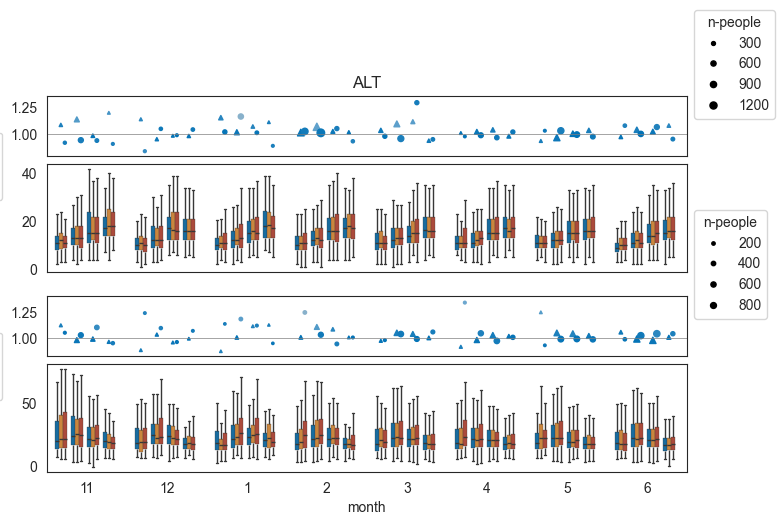

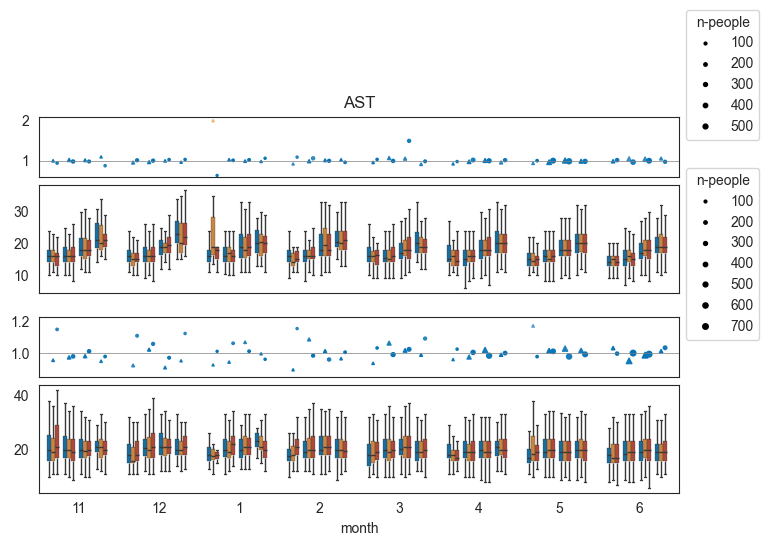

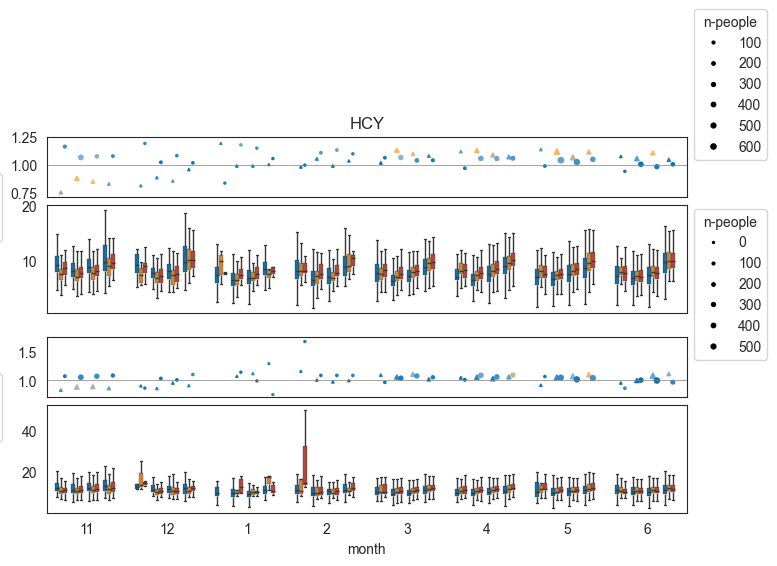

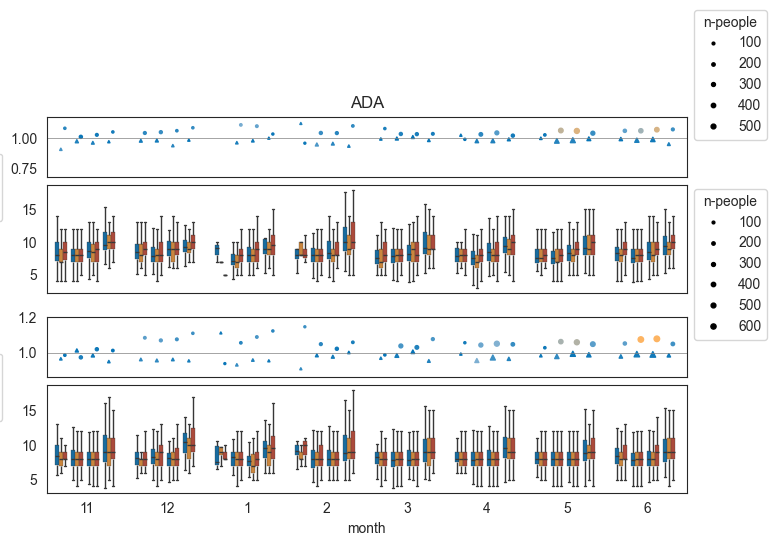

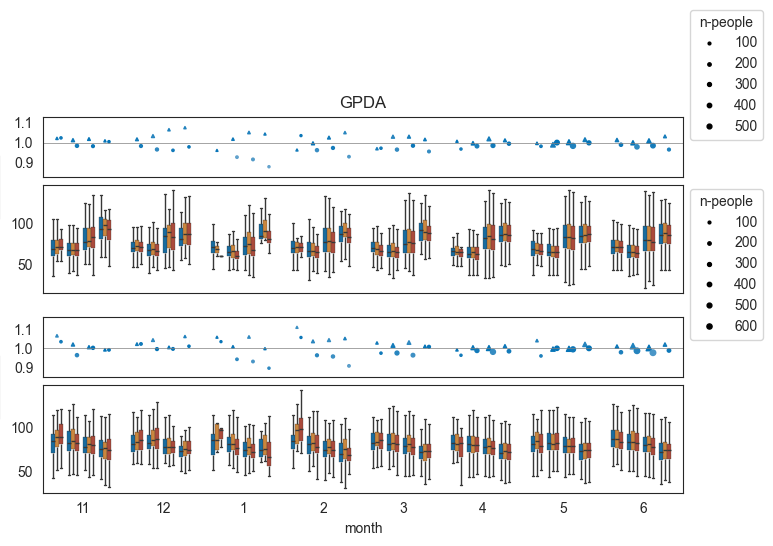

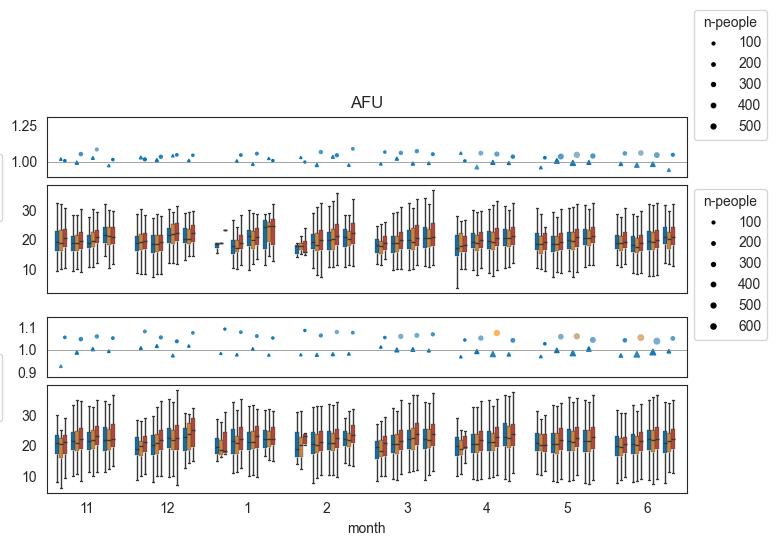

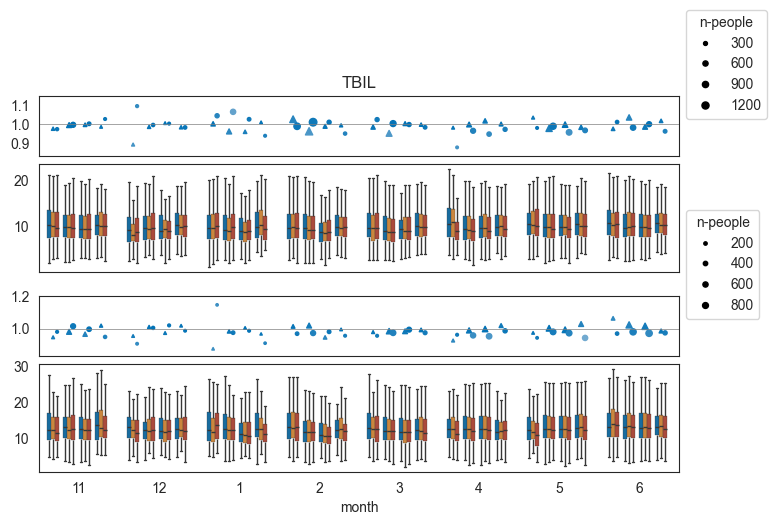

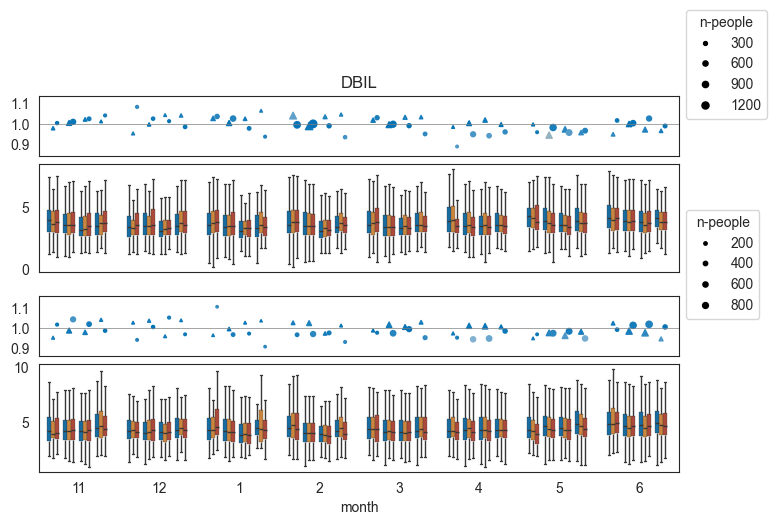

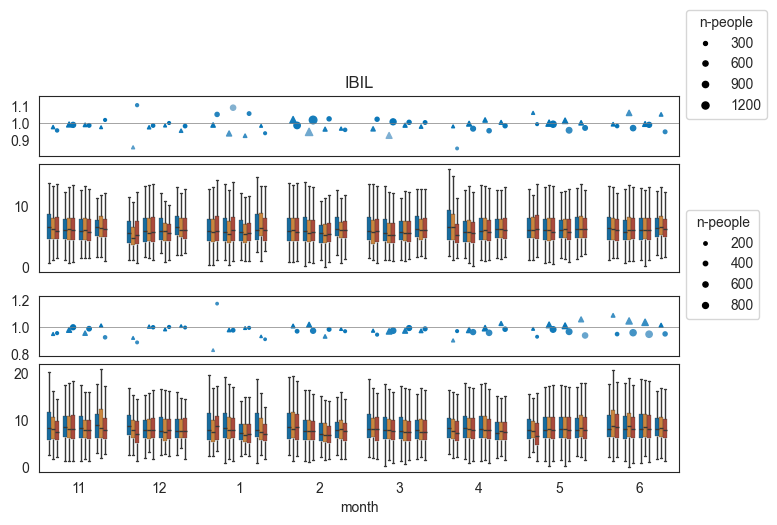

In [13]:
l_dfs = []
plot_box = BxxPvalue(figsize=(8,4), rename_dict=rename_dict)
for tag in l_tags:
    fig, df_data = plot_box.plot_bxxplot_pvalue(df_table1plus_3p_revMM, x="month", y=tag,
                                       hue_col_order=["female", "male"], order=[11,12, 1,2,3, 4,5,6], sns_type="boxplot"
    )
    l_dfs.append(df_data)
    

In [14]:
pd.concat(l_dfs).to_csv(f"{workdir}/figure4_pvalues.csv")

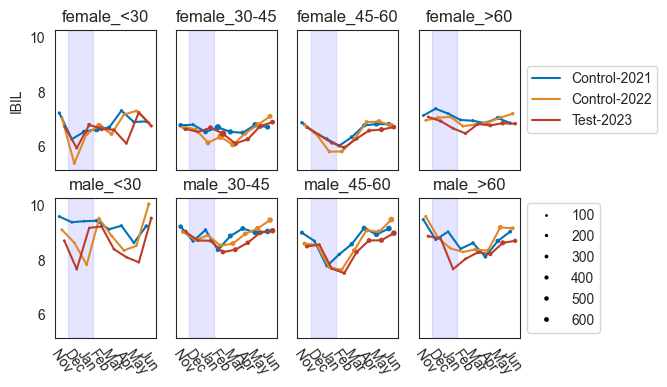

In [15]:
plt_scatter = Scatter(figsize=(6,4), rename_dict=rename_dict)
fig,df_scatter_3p = plt_scatter.plot_scatter_ax_plus(df_table1plus_3p_revMM, tag, order=l_months)